In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

!wget -q https://raw.githubusercontent.com/tsunrise/colab-github/main/colab_github.py
import colab_github
colab_github.github_auth(persistent_key=True)

Mounted at /content/drive
Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
Looks that a private key is already created. If you have already push it to github, no action required.
 Otherwise, Please go to https://github.com/settings/ssh/new to upload the following key: 
ssh-ed25519 AAAAC3NzaC1lZDI1NTE5AAAAICeyklL46g42c+kOiDGQYpBIkUVa8Oott1qwDIqq8fti root@8ae8a1039f30

Please use SSH method to clone repo.


In [ ]:
!pip install ultralytics

In [ ]:
%cd /content/drive/MyDrive/Colab\ Notebooks/EECS_442_HOI

/content/drive/MyDrive/Colab Notebooks/EECS_442_HOI


In [ ]:
from vcoco.dataloader import get_train_val_test_loaders
from tqdm import tqdm
from matplotlib import pyplot as plt
import torch

added /content/drive/MyDrive/Colab Notebooks/EECS_442_HOI/vcoco/coco/PythonAPI to pythonpath


In [ ]:
train_loader, test_loader = get_train_val_test_loaders(5)

load hold 1 / 26
total test image number 3608
load image from  0 to 100


100%|██████████| 100/100 [00:43<00:00,  2.28it/s]


load hold 1 / 26
total test image number 3608
load image from  100 to 120


100%|██████████| 20/20 [00:08<00:00,  2.30it/s]


tensor([[ 0.3371,  0.3456],
        [ 0.3171,  0.2069],
        [ 0.2545,  0.6065],
        [ 0.7508,  0.4984],
        [-0.7812, -0.7812]])
tensor([[ 0.2627,  0.3352],
        [-0.7812, -0.7812],
        [ 0.6241,  0.5536],
        [ 0.3050,  0.4872],
        [ 0.6153,  0.3974]])
tensor([[ 0.4348,  0.6008],
        [ 0.2992,  0.4846],
        [-0.7812, -0.7812],
        [ 0.6386,  0.4982],
        [ 0.2714,  0.5301]])
tensor([[0.3528, 0.4339],
        [0.3407, 0.2871],
        [0.6310, 0.3291],
        [0.7343, 0.3978],
        [0.3906, 0.5383]])


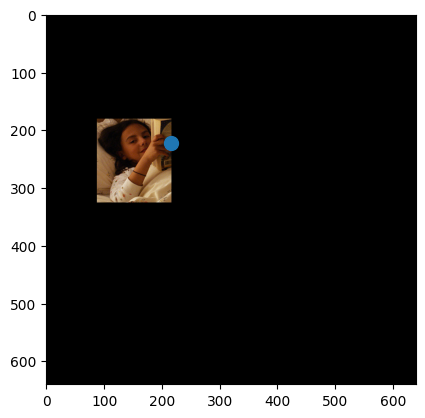

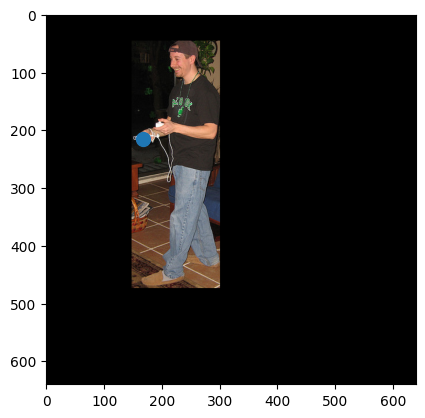

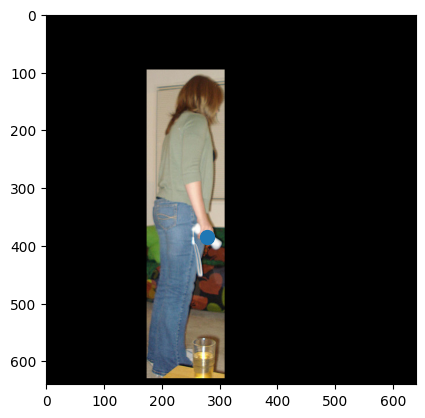

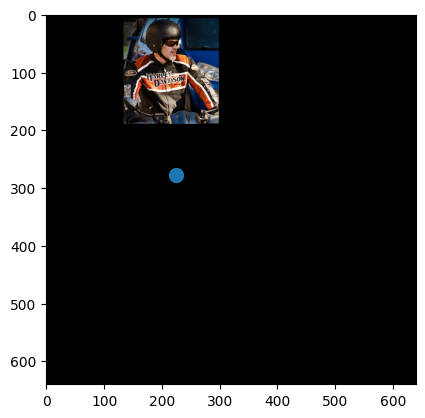

In [ ]:
# visualize some data
# load ith batch to varialbe X and y
for i ,(X, y) in enumerate(test_loader):
  # print(X.shape)
  # print(y.shape)
  # plt.imshow(X)
  # print(X[0])
  print(y)
  y = (y * 640).int()
  if i < 10:
    plt.figure()
    plt.imshow(X[0].permute(1,2,0))
    plt.plot(y[0][0], y[0][1], marker='.', markersize=20)


In [ ]:
# Function to display a list of images
def display_images(image_list, title):
    if image_list:
        num_images = len(image_list)
        fig, axes = plt.subplots(1, num_images, figsize=(num_images * 3, 3))
        if num_images == 1:
            axes = [axes]  # Make it iterable
        for ax, img_tensor in zip(axes, image_list):
            np_image = img_tensor.permute(1, 2, 0).cpu().numpy()
            ax.imshow(np_image)
            ax.axis('off')
        plt.suptitle(title)
        plt.show()
    else:
        print(f"No {title.lower()} images to display.")


torch.Size([5, 3, 640, 640])
torch.Size([3, 640, 640])
torch.Size([3, 640, 640])
image_shape torch.Size([3, 640, 640])

0: 640x640 1 person, 1 couch, 1 bed, 9.6ms
Speed: 3.1ms preprocess, 9.6ms inference, 59.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 8.7ms
Speed: 2.4ms preprocess, 8.7ms inference, 22.9ms postprocess per image at shape (1, 3, 640, 640)


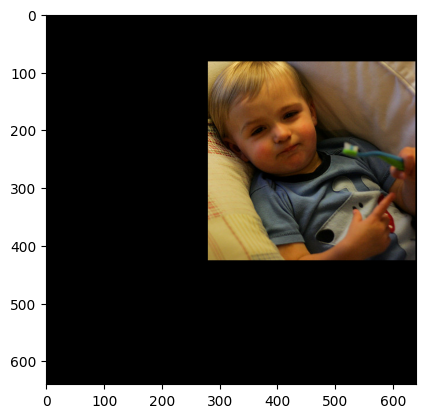

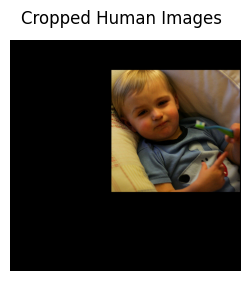

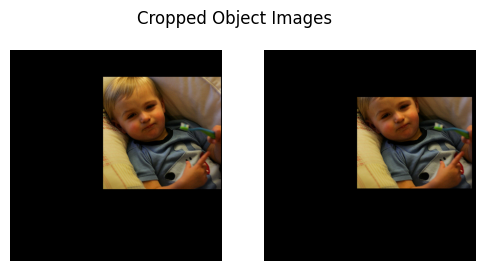

torch.Size([3, 640, 640])
tensor(1., dtype=torch.float64)


Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 132MB/s]
/usr/local/lib/python3.10/dist-packages/torch/overrides.py:110: UserWarning: 'has_cuda' is deprecated, please use 'torch.backends.cuda.is_built()'
  torch.has_cuda,
/usr/local/lib/python3.10/dist-packages/torch/overrides.py:111: UserWarning: 'has_cudnn' is deprecated, please use 'torch.backends.cudnn.is_available()'
  torch.has_cudnn,
/usr/local/lib/python3.10/dist-packages/torch/overrides.py:117: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  torch.has_mps,
/usr/local/lib/python3.10/dist-packages/torch/overrides.py:118: UserWarning: 'has_mkldnn' is deprecated, please use 'torch.backends.mkldnn.is_available()'
  torch.has_mkldnn,
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter 

torch.Size([5, 2048, 7, 7])


In [ ]:
from os import pipe
import pipeline
for i ,(X, y) in enumerate(train_loader):
  if i == 6:
    print(X.shape)
    plt.imshow(X[0].permute(1,2,0)) # convert to 640x640x3
    print(X[0].shape)
    input = X[0]
    # input = input.reshape(1, input.shape[0], input.shape[1], input.shape[2])
    print(input.shape)
    cropped_human, cropped_objects, _ , _ , id_objects = pipeline.extract_human_object(input)

    # Display cropped human images
    display_images(cropped_human, "Cropped Human Images")

    # Display cropped object images
    display_images(cropped_objects, "Cropped Object Images")

    print(cropped_human[0].shape)

    # return a list of feature from layer 3 and 4
    print(torch.max(cropped_human[0]))
    feature = pipeline.extract_feature(X)
    print(feature['layer4'].shape)

In [ ]:
layer_4_feature = feature['layer4']
print(layer_4_feature.shape)

from MLP_POI import MLP_POI
# create MLP
input_size = layer_4_feature.shape[1] * layer_4_feature.shape[2] * layer_4_feature.shape[3]
MLP = MLP_POI(input_size, [1024, 512, 256, 2])


torch.Size([5, 2048, 7, 7])


In [ ]:
result = MLP(layer_4_feature)
print(result)

tensor([[2.7037e-04, 4.7513e-05],
        [1.6529e-05, 2.5002e-06],
        [2.0320e-04, 4.7713e-05],
        [3.6435e-04, 8.9844e-05],
        [0.0000e+00, 0.0000e+00]], grad_fn=<AddmmBackward0>)


In [ ]:
x = torch.rand(16, 2048, 7, 7)
test_result = MLP(x)
print(test_result.shape)
print(test_result)

torch.Size([16, 2])
tensor([[0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00],
        [1.6307e-05, 2.4666e-06],
        [0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00],
        [1.2856e-06, 1.9446e-07],
        [1.1876e-04, 2.9284e-05],
        [0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00],
        [5.5149e-05, 8.3420e-06],
        [4.6998e-05, 7.1090e-06],
        [2.9645e-06, 7.3101e-07],
        [0.0000e+00, 0.0000e+00],
        [3.1450e-05, 4.7572e-06]], grad_fn=<AddmmBackward0>)



0: 640x640 1 person, 21.1ms
Speed: 2.4ms preprocess, 21.1ms inference, 24.4ms postprocess per image at shape (1, 3, 640, 640)
(640, 640, 3)


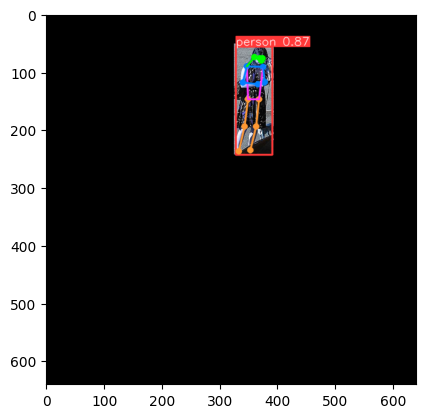

In [ ]:
from ultralytics import YOLO
from PIL import Image

model = YOLO('yolov8n-pose.pt')

for i ,(X, y) in enumerate(train_loader):
  if i == 1:
    input = X[4].unsqueeze(0)
    # input = input.reshape(1, input.shape[0], input.shape[1], input.shape[2])
    results = model(input)

    for r in results:
        im_array = r.plot()  # plot a BGR numpy array of predictions
        print(im_array.shape)
        im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
        plt.imshow(im)  # show image

# Training script

In [ ]:
from MLP_POI import MLP_POI
import torch.optim as optim
import torch.nn as nn

print("PyTorch Version: ",torch.__version__)
# print("Torchvision Version: ",torchvision.__version__)
# Detect if we have a GPU available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
if torch.cuda.is_available():
    print("Using the GPU!")
else:
    print("WARNING: Could not find GPU! Using CPU only. If you want to enable GPU, please to go Edit > Notebook Settings > Hardware Accelerator and select GPU.")

dataloaders = {'train': train_loader, 'test': test_loader}

# create MLP
input_size = 2048 * 7 * 7 # size of layer 4 feature
MLP = MLP_POI(input_size, [1024, 512, 256, 2])
MLP = MLP.to(device)

# define constant for hyperparameters
LR = 1e-1 # learning rate
DECAY = 0  #1e-2 # decay rate

optimizer = optim.Adam(MLP.parameters(), lr=LR, weight_decay=DECAY)
criterion = nn.MSELoss()

pipeline.train_model(MLP, dataloaders, criterion, optimizer, device=device, save_dir=None)

PyTorch Version:  2.1.0+cu118
Using the GPU!
Epoch 0/24
----------


  0%|          | 0/20 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
100%|██████████| 20/20 [00:15<00:00,  1.30it/s]


train Loss: 16281923.6464 Acc: 0.0000


100%|██████████| 4/4 [00:03<00:00,  1.14it/s]


test Loss: 0.5677 Acc: 0.0000
Epoch 1/24
----------


100%|██████████| 20/20 [00:15<00:00,  1.28it/s]


train Loss: 0.6302 Acc: 0.0000


100%|██████████| 4/4 [00:02<00:00,  1.68it/s]


test Loss: 0.6350 Acc: 0.0000
Epoch 2/24
----------


100%|██████████| 20/20 [00:15<00:00,  1.27it/s]


train Loss: 0.6641 Acc: 0.0000


100%|██████████| 4/4 [00:02<00:00,  1.72it/s]


test Loss: 0.6454 Acc: 0.0000
Epoch 3/24
----------


100%|██████████| 20/20 [00:15<00:00,  1.30it/s]


train Loss: 0.6688 Acc: 0.0000


100%|██████████| 4/4 [00:02<00:00,  1.69it/s]


test Loss: 0.6462 Acc: 0.0000
Epoch 4/24
----------


100%|██████████| 20/20 [00:15<00:00,  1.28it/s]


train Loss: 0.6688 Acc: 0.0000


100%|██████████| 4/4 [00:02<00:00,  1.70it/s]


test Loss: 0.6455 Acc: 0.0000
Epoch 5/24
----------


100%|██████████| 20/20 [00:15<00:00,  1.31it/s]


train Loss: 0.6679 Acc: 0.0000


100%|██████████| 4/4 [00:02<00:00,  1.36it/s]


test Loss: 0.6445 Acc: 0.0000
Epoch 6/24
----------


100%|██████████| 20/20 [00:14<00:00,  1.35it/s]


train Loss: 0.6669 Acc: 0.0000


100%|██████████| 4/4 [00:03<00:00,  1.03it/s]


test Loss: 0.6434 Acc: 0.0000
Epoch 7/24
----------


100%|██████████| 20/20 [00:15<00:00,  1.29it/s]


train Loss: 0.6658 Acc: 0.0000


100%|██████████| 4/4 [00:03<00:00,  1.31it/s]


test Loss: 0.6422 Acc: 0.0000
Epoch 8/24
----------


100%|██████████| 20/20 [00:15<00:00,  1.27it/s]


train Loss: 0.6646 Acc: 0.0000


100%|██████████| 4/4 [00:02<00:00,  1.68it/s]


test Loss: 0.6409 Acc: 0.0000
Epoch 9/24
----------


100%|██████████| 20/20 [00:15<00:00,  1.31it/s]


train Loss: 0.6633 Acc: 0.0000


100%|██████████| 4/4 [00:02<00:00,  1.68it/s]


test Loss: 0.6395 Acc: 0.0000
Epoch 10/24
----------


100%|██████████| 20/20 [00:15<00:00,  1.28it/s]


train Loss: 0.6620 Acc: 0.0000


100%|██████████| 4/4 [00:02<00:00,  1.68it/s]


test Loss: 0.6380 Acc: 0.0000
Epoch 11/24
----------


100%|██████████| 20/20 [00:15<00:00,  1.29it/s]


train Loss: 0.6606 Acc: 0.0000


100%|██████████| 4/4 [00:02<00:00,  1.66it/s]


test Loss: 0.6365 Acc: 0.0000
Epoch 12/24
----------


100%|██████████| 20/20 [00:15<00:00,  1.29it/s]


train Loss: 0.6591 Acc: 0.0000


100%|██████████| 4/4 [00:03<00:00,  1.26it/s]


test Loss: 0.6349 Acc: 0.0000
Epoch 13/24
----------


100%|██████████| 20/20 [00:15<00:00,  1.30it/s]


train Loss: 0.6576 Acc: 0.0000


100%|██████████| 4/4 [00:03<00:00,  1.03it/s]


test Loss: 0.6333 Acc: 0.0000
Epoch 14/24
----------


100%|██████████| 20/20 [00:15<00:00,  1.29it/s]


train Loss: 0.6560 Acc: 0.0000


100%|██████████| 4/4 [00:02<00:00,  1.57it/s]


test Loss: 0.6316 Acc: 0.0000
Epoch 15/24
----------


100%|██████████| 20/20 [00:15<00:00,  1.31it/s]


train Loss: 0.6543 Acc: 0.0000


100%|██████████| 4/4 [00:02<00:00,  1.65it/s]


test Loss: 0.6298 Acc: 0.0000
Epoch 16/24
----------


100%|██████████| 20/20 [00:15<00:00,  1.28it/s]


train Loss: 0.6526 Acc: 0.0000


100%|██████████| 4/4 [00:02<00:00,  1.64it/s]


test Loss: 0.6280 Acc: 0.0000
Epoch 17/24
----------


100%|██████████| 20/20 [00:15<00:00,  1.31it/s]


train Loss: 0.6508 Acc: 0.0000


100%|██████████| 4/4 [00:02<00:00,  1.68it/s]


test Loss: 0.6261 Acc: 0.0000
Epoch 18/24
----------


100%|██████████| 20/20 [00:15<00:00,  1.31it/s]


train Loss: 0.6490 Acc: 0.0000


100%|██████████| 4/4 [00:02<00:00,  1.67it/s]


test Loss: 0.6242 Acc: 0.0000
Epoch 19/24
----------


100%|██████████| 20/20 [00:15<00:00,  1.29it/s]


train Loss: 0.6472 Acc: 0.0000


100%|██████████| 4/4 [00:03<00:00,  1.24it/s]


test Loss: 0.6222 Acc: 0.0000
Epoch 20/24
----------


100%|██████████| 20/20 [00:15<00:00,  1.28it/s]


train Loss: 0.6452 Acc: 0.0000


100%|██████████| 4/4 [00:03<00:00,  1.06it/s]


test Loss: 0.6201 Acc: 0.0000
Epoch 21/24
----------


100%|██████████| 20/20 [00:14<00:00,  1.33it/s]


train Loss: 0.6433 Acc: 0.0000


100%|██████████| 4/4 [00:02<00:00,  1.51it/s]


test Loss: 0.6180 Acc: 0.0000
Epoch 22/24
----------


100%|██████████| 20/20 [00:15<00:00,  1.25it/s]


train Loss: 0.6413 Acc: 0.0000


100%|██████████| 4/4 [00:02<00:00,  1.69it/s]


test Loss: 0.6159 Acc: 0.0000
Epoch 23/24
----------


100%|██████████| 20/20 [00:15<00:00,  1.29it/s]


train Loss: 0.6392 Acc: 0.0000


100%|██████████| 4/4 [00:02<00:00,  1.66it/s]


test Loss: 0.6137 Acc: 0.0000
Epoch 24/24
----------


100%|██████████| 20/20 [00:15<00:00,  1.31it/s]


train Loss: 0.6371 Acc: 0.0000


100%|██████████| 4/4 [00:02<00:00,  1.69it/s]

test Loss: 0.6115 Acc: 0.0000
Best test Acc: 0.000000


(MLP_POI(
   (classifier): Sequential(
     (0): Linear(in_features=100352, out_features=1024, bias=True)
     (1): ReLU(inplace=True)
     (2): Dropout(p=0.3, inplace=False)
     (3): Linear(in_features=1024, out_features=512, bias=True)
     (4): ReLU(inplace=True)
     (5): Dropout(p=0.3, inplace=False)
     (6): Linear(in_features=512, out_features=256, bias=True)
     (7): ReLU(inplace=True)
     (8): Dropout(p=0.3, inplace=False)
     (9): Linear(in_features=256, out_features=2, bias=True)
     (10): ReLU(inplace=True)
     (11): Dropout(p=0.3, inplace=False)
     (12): Linear(in_features=2, out_features=2, bias=True)
   )
 ),
 [tensor(0., device='cuda:0', dtype=torch.float64),
  tensor(0., device='cuda:0', dtype=torch.float64),
  tensor(0., device='cuda:0', dtype=torch.float64),
  tensor(0., device='cuda:0', dtype=torch.float64),
  tensor(0., device='cuda:0', dtype=torch.float64),
  tensor(0., device='cuda:0', dtype=torch.float64),
  tensor(0., device='cuda:0', dtype=torch.float

In [ ]:
# visualize result
# load ith batch to varialbe X and y
for j ,(X, y) in enumerate(test_loader):
  features = pipeline.extract_feature(X.to(device), device)['layer4']
  result = MLP(features)
  y = (y * 640).int()
  for i in range(len(X)):
    plt.figure()
    plt.imshow(X[i].permute(1,2,0))
    plt.plot(result[i][0].cpu().detach().numpy(), result[i][1].cpu().detach().numpy(), marker='.', markersize=20)

NameError: ignored

In [ ]:
'from cnn import CNN

model = CNN()
model(torch.rand(16,3,640,640))

torch.Size([16, 64, 5, 5])


tensor([[ 0.0009, -0.0002],
        [ 0.0003,  0.0001],
        [-0.0022,  0.0018],
        [-0.0005,  0.0008],
        [ 0.0019, -0.0026],
        [-0.0062, -0.0027],
        [ 0.0041,  0.0013],
        [-0.0004, -0.0038],
        [ 0.0009,  0.0007],
        [-0.0052, -0.0031],
        [-0.0026,  0.0014],
        [ 0.0015, -0.0035],
        [-0.0050, -0.0052],
        [ 0.0030, -0.0029],
        [-0.0019, -0.0002],
        [-0.0003, -0.0025]], grad_fn=<AddmmBackward0>)